In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-time-prediction/sleeptime_prediction_dataset.csv


### For Reference the data is generated using the following script (Consider this as hint and try fitting to the used equation)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

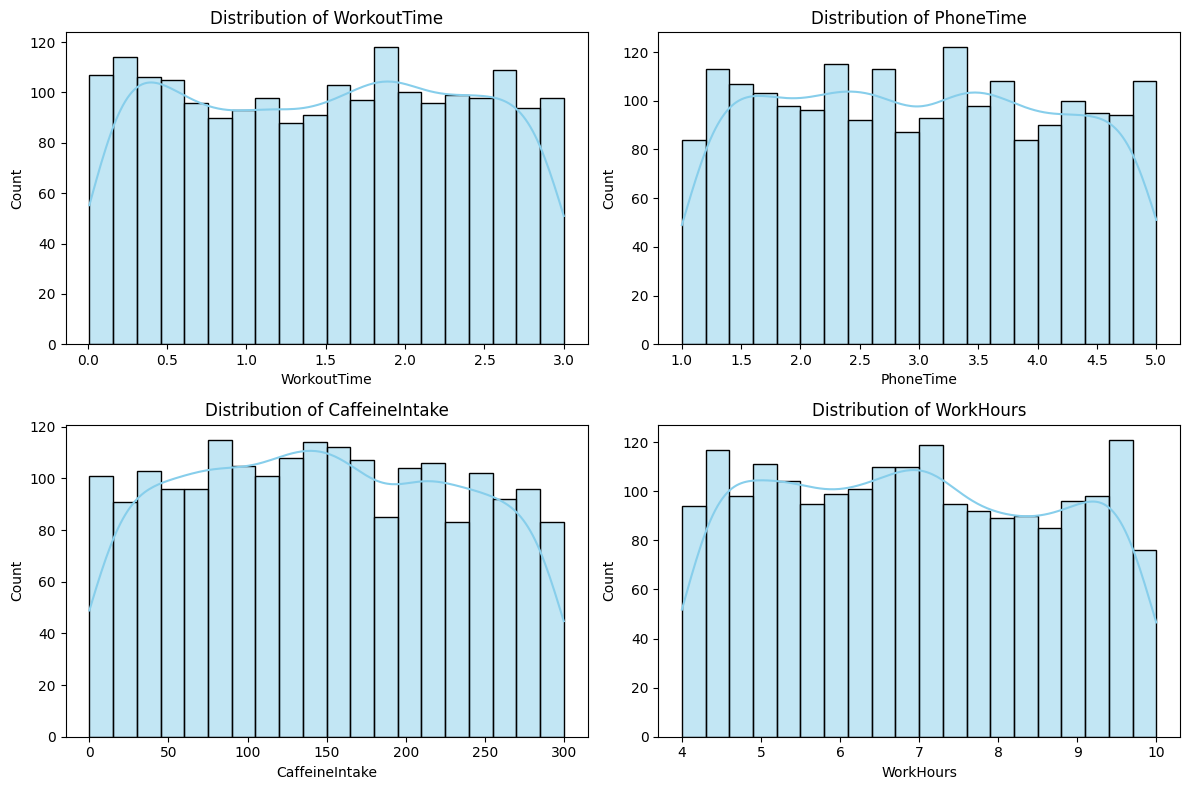

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 2000
data = {
    "WorkoutTime": np.random.uniform(0, 3, num_samples).round(2),
    "ReadingTime": np.random.uniform(0, 2, num_samples).round(2),
    "PhoneTime": np.random.uniform(1, 5, num_samples).round(2),
    "WorkHours": np.random.uniform(4, 10, num_samples).round(2),
    "CaffeineIntake": np.random.uniform(0, 300, num_samples).round(2),
    "RelaxationTime": np.random.uniform(0, 2, num_samples).round(2),
    "StressLevel": np.random.uniform(0, 10, num_samples).round(2),
    "DietQuality": np.random.uniform(0, 10, num_samples).round(2),
    "OutdoorActivity": np.random.uniform(0, 3, num_samples).round(2),
    "WeatherConditions": np.random.uniform(1, 10, num_samples).round(2),
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualize distributions of some features
plt.figure(figsize=(12, 8))

# Plot histogram for a few features
for i, col in enumerate(["WorkoutTime", "PhoneTime", "CaffeineIntake", "WorkHours"]):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


In [3]:
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,StressLevel,DietQuality,OutdoorActivity,WeatherConditions
0,1.12,0.52,3.29,7.89,216.08,0.75,6.54,0.73,0.01,6.81
1,2.85,0.49,4.22,5.03,206.18,0.67,0.80,0.89,0.00,4.62
2,2.20,1.81,4.04,9.23,28.73,0.35,2.42,6.52,1.42,5.25
3,1.80,0.50,1.62,7.68,276.77,1.21,7.74,4.87,0.09,7.45
4,0.47,0.54,1.60,4.94,170.54,0.95,5.29,7.90,2.92,8.89


## Calculate Sleeptime

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


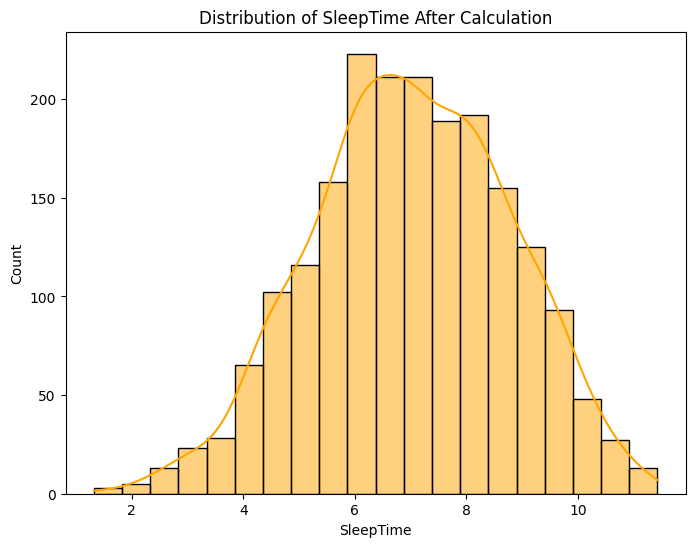

In [4]:
# Define sleep time calculation function
def calculate_sleep_time(row):
    return (
        8
        + (0.5 * row["WorkoutTime"])
        + (0.3 * row["ReadingTime"])
        - (0.6 * row["PhoneTime"])
        - (0.4 * row["WorkHours"])
        - (0.002 * row["CaffeineIntake"])
        + (0.4 * row["RelaxationTime"])
        - (0.2 * row["StressLevel"])
        + (0.3 * row["DietQuality"])
        + (0.2 * row["OutdoorActivity"])
        + (0.1 * row["WeatherConditions"])
        + (0.1 * row["WorkoutTime"] * row["WorkHours"])
    )

# Calculate SleepTime
df["SleepTime"] = df.apply(calculate_sleep_time, axis=1)

# Visualize the distribution of SleepTime after calculation
plt.figure(figsize=(8, 6))
sns.histplot(df["SleepTime"], kde=True, bins=20, color="orange")
plt.title("Distribution of SleepTime After Calculation")
plt.show()


## Clip SleepTime to a Realistic Range

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


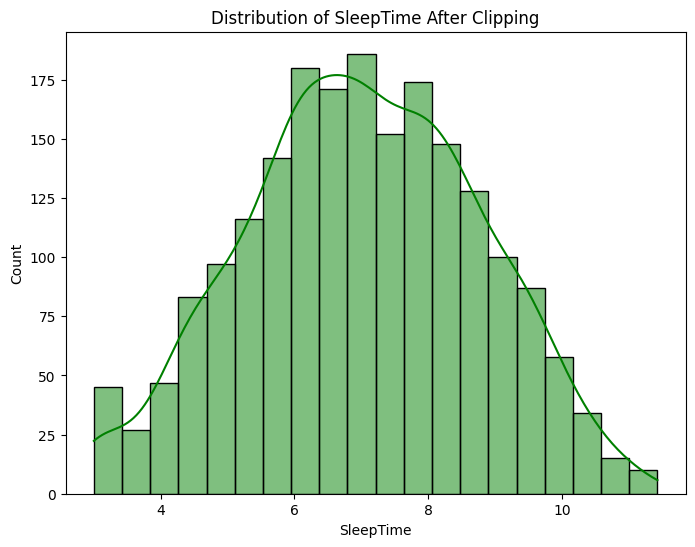

In [5]:
# Clip SleepTime to a broader realistic range (3 to 16 hours)
df["SleepTime"] = df["SleepTime"].clip(lower=3, upper=16).round(2)

# Visualize the effect of clipping on SleepTime
plt.figure(figsize=(8, 6))
sns.histplot(df["SleepTime"], kde=True, bins=20, color="green")
plt.title("Distribution of SleepTime After Clipping")
plt.show()


## Outliers and Visualize Their Impact

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


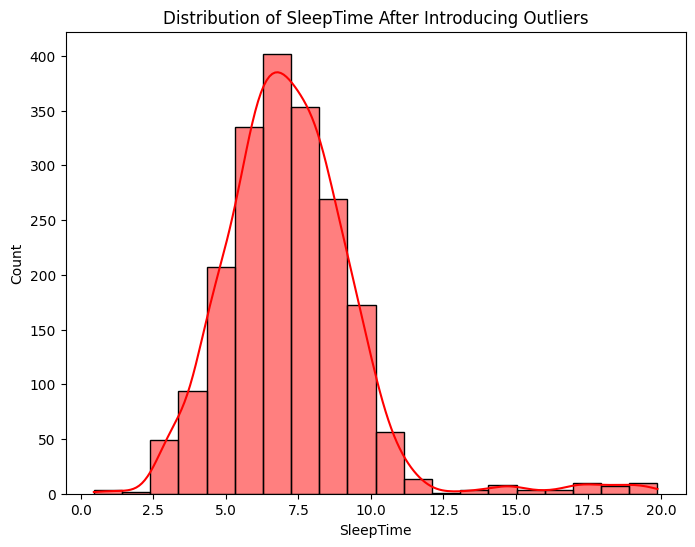

In [6]:
# Introduce outliers in a more controlled manner
num_outliers = int(0.05 * num_samples)  # 5% of data as outliers
outlier_indices = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices, "SleepTime"] = np.random.uniform(0, 20, num_outliers).round(2)  # Extreme values

# Visualize the effect of introducing outliers
plt.figure(figsize=(8, 6))
sns.histplot(df["SleepTime"], kde=True, bins=20, color="red")
plt.title("Distribution of SleepTime After Introducing Outliers")
plt.show()

## Final Dataset Save and Overview

In [7]:
# Save the dataset to a CSV file
df.to_csv("enhanced_sleeptime_prediction_dataset.csv", index=False)

# Final statistics
print("\nFinal Statistics of the Dataset:")
print(df.describe())

# Final message
print("\nEnhanced dataset created and saved as 'enhanced_sleeptime_prediction_dataset.csv'.")


Final Statistics of the Dataset:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime  StressLevel  DietQuality  OutdoorActivity  \
count     2000.000000  2000.000000  2000.000000      2000.000000   
mean         1.010955     4.955160     4.979520         1.532020   
std          0.582619     2.908161     2.902903         0.854051   


#### The dataset generated through these five stages provides a clear picture of how sleep data can be calculated and processed. Starting with generating synthetic data for various features, followed by calculating **SleepTime** based on factors such as workout time, work hours, and caffeine intake, the data was then clipped to ensure sleep values remained realistic, ranging from 3 to 16 hours. Next, outliers were introduced to observe their impact on the distribution, demonstrating how extreme values can affect analysis. Overall, this process highlights the importance of data cleaning and transformation to ensure that the dataset is ready for further analysis or accurate predictive modeling.